# K-Nearest Nieghbours in Classification

- K-NN algorithm can be used for Regression as well as for classification but mostly it is used for the classification problems.

- K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

- It is also called a lazy learner algorithm.

**To Calculate distance** between data points there are two:

- **L^1 = |x2-x1| + |y2 - y1| (Manhattan Distance)**

- **L^2 = sprt((x2-x1)^2 + (y2-y1)^2) (Euclidean Distance)**

In [2]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv(r"/workspaces/Data_Science_Notes/machine_learning/supervised_learning_in_ml/classification/data/Social_Network_Ads.csv")
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
dataset = dataset.drop(columns = ["User ID", "Gender"])

In [39]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
x = dataset.iloc[:, : -1]
y = dataset["Purchased"]

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

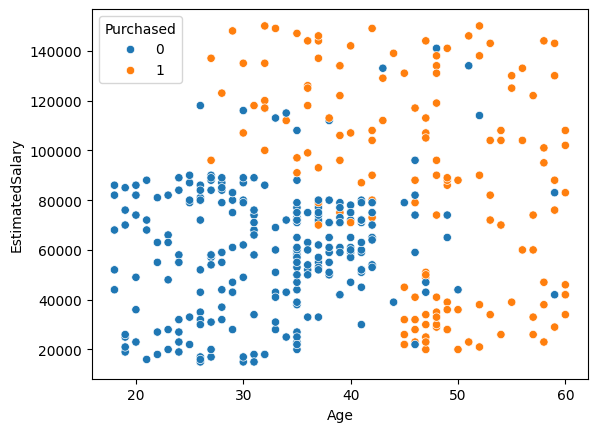

In [7]:
sns.scatterplot(x = "Age", y = "EstimatedSalary", data = dataset, hue = "Purchased")

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns = x.columns)
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [10]:
dataset.shape

(400, 3)

In [11]:
x.shape

(400, 2)

In [12]:
y.shape

(400,)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [32]:
knn.score(x_train, y_train)*100

92.33333333333333

In [33]:
knn.score(x_test, y_test)*100

92.0

In [37]:
for i in range(1, 31):
    knn1 = KNeighborsClassifier(n_neighbors = i)
    knn1.fit(x_train, y_train)
    print(knn1.score(x_train, y_train)*100, knn1.score(x_test, y_test)*100, i)

99.66666666666667 87.0 1
92.33333333333333 85.0 2
92.33333333333333 92.0 3
92.0 91.0 4
91.0 93.0 5
91.33333333333333 92.0 6
91.66666666666666 93.0 7
90.33333333333333 93.0 8
91.0 94.0 9
90.0 93.0 10
91.33333333333333 93.0 11
91.66666666666666 93.0 12
91.66666666666666 93.0 13
90.0 93.0 14
89.66666666666666 93.0 15
89.0 94.0 16
90.66666666666666 94.0 17
90.66666666666666 94.0 18
90.66666666666666 94.0 19
90.33333333333333 93.0 20
90.0 93.0 21
90.0 93.0 22
90.0 93.0 23
89.66666666666666 93.0 24
89.66666666666666 93.0 25
89.66666666666666 93.0 26
90.0 93.0 27
89.66666666666666 93.0 28
89.66666666666666 93.0 29
89.0 93.0 30


In [40]:
knn.predict([[1.083596, -0.990844]])

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [43]:
from mlxtend.plotting import plot_decision_regions

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

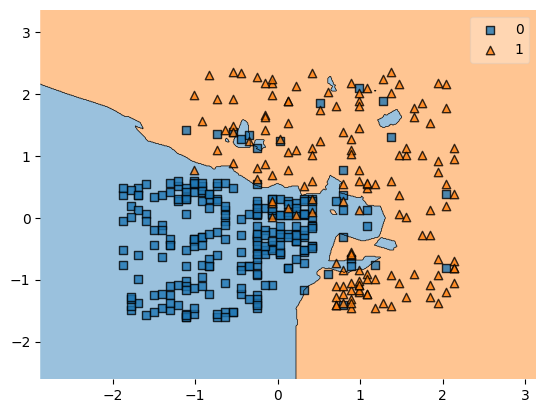

In [44]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf = knn)